# 0: importacao de bibliotecas


In [25]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib
from tqdm import tqdm
import warnings
from MyFiles import Security

warnings.filterwarnings('ignore')

## Verificar versoes

In [3]:
print('Pandas Version:',pd.__version__)
print('Seaborn Version:',sns.__version__)
print('Numpy Version:',np.__version__)

Pandas Version: 1.2.4
Seaborn Version: 0.11.1
Numpy Version: 1.20.1


## Funcoes

In [30]:
def chose_df(c_df,c_row,c_Lt,c_ind):
    #input: Dataframe, lista de features, lista de indices, codigo do indice a filtrar
    #output: Dataframe filtrado
    #filtra o DataFrame para a feature definida
    return c_df.loc[(c_df[c_row] == c_Lt[c_ind])]  

def erros_sondas(es_Df,es_Lt):
    
    #Descobrir os valorers minimos e contar as ocorrencias
    dict_failled={'intensidadeVentoKM':0, 'temperatura':0, 'radiacao':0, 'precAcumulada':0,
                   'intensidadeVento':0, 'humidade':0, 'pressao':0}
    code_error = es_Df.min()  # tenho que definir de forma diferente dos minimos
    #print(code_error)
    for i in range(len(es_Lt)):
        if i>=2:
            dict_failled[es_Lt[i]] = es_Df.loc[es_Df[es_Lt[i]]==code_error[i],es_Lt[i]].count()
    return dict_failled

def rep_error(re_Df,re_Lt):
    #input: DataFrame, Lista de features
    #output: DataFrame con os erros corrigidos
    #reporta  numero de erros encontrados no Dataframe re_Df
    for i in range(len(re_Lt)):
        if i>1:
            re_Df.loc[re_Df[re_Lt[i]]==-99.0,re_Lt[i]]= re_Df[re_Lt[i]].mean()
    return re_Df

def station_choice(sc_Stations_ID,sc_DF1,sc_feature_list,sc_DF_estation,sc_j):
    station = sc_Stations_ID[sc_j]
    DF11 = sc_DF1.loc[sc_DF1['ID']==station]                      #constroi DF com estacao pre-definida
    DF11= DF11.sort_values(sc_feature_list[0], ascending=True) #ordena o df
    days = DF11[sc_feature_list[0]].unique()                   #par ao eixo dos x do plot
    station_name = sc_DF_estation.loc[sc_DF_estation['ID'] == station,'Local'].values[0] #para o titulo do plot
    return(station_name,sc_feature_list,DF11,days)




# 1. Codigo 

In [5]:
sec= Security()
folder= sec.datasets
os.chdir(folder)
fil = os.listdir()
file_csv = fil[-2]
Data_DF = pd.read_csv(file_csv)
DF_estation = pd.read_csv('Z.csv')
Data_DF.pop('Unnamed: 0') 
DF_estation.pop('Unnamed: 0') 
DF_base = Data_DF.copy()
feature_list = DF_base.columns                      # Data Features List
featureSt_list = DF_estation.columns                # Station Feature List
Stations_ID = DF_base[feature_list[1]].unique()     # Station in to Dataset
Day_list = Data_DF['D/H Sample'].str[0:10].unique() # Days in to Dataset
Day_list.sort()
Stations_ID.sort()
Error_measure = erros_sondas(DF_base,feature_list)  
DF1 = rep_error(DF_base,feature_list)
DF_estation['GPS'] = DF_estation['GPS'].map(lambda x: x.lstrip('[').rstrip(']'))
new = DF_estation["GPS"].str.split(",", n = 1, expand = True)
DF_estation["X"]= new[0].astype(float) 
DF_estation["Y"]= new[1].astype(float)


In [6]:
print(f"Dias no Dataset: {len(Day_list)}\n",Day_list )
print(f"\nEstacoes meteorologicas:{len(Stations_ID)}\n",Stations_ID )

Dias no Dataset: 20
 ['2021-11-22' '2021-11-23' '2021-11-24' '2021-11-25' '2021-11-26'
 '2021-11-27' '2021-11-28' '2021-11-29' '2021-11-30' '2021-12-01'
 '2021-12-02' '2021-12-03' '2021-12-04' '2021-12-05' '2021-12-06'
 '2021-12-07' '2021-12-08' '2021-12-09' '2021-12-10' '2021-12-11']

Estacoes meteorologicas:185
 [ 1200501  1200502  1200504  1200506  1200507  1200510  1200511  1200512
  1200515  1200521  1200522  1200524  1200531  1200533  1200535  1200541
  1200545  1200548  1200551  1200554  1200558  1200559  1200560  1200562
  1200567  1200568  1200570  1200571  1200575  1200576  1200579  1210513
  1210577  1210604  1210605  1210606  1210611  1210612  1210615  1210616
  1210619  1210622  1210630  1210632  1210633  1210635  1210637  1210643
  1210644  1210649  1210654  1210655  1210657  1210663  1210666  1210669
  1210671  1210683  1210685  1210686  1210687  1210690  1210697  1210698
  1210702  1210704  1210705  1210707  1210713  1210716  1210718  1210721
  1210724  1210726  1210729

In [7]:
Data_DF.info()   # view info Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77445 entries, 0 to 77444
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   D/H Sample          77445 non-null  object 
 1   ID                  77445 non-null  int64  
 2   intensidadeVentoKM  77445 non-null  float64
 3   temperatura         77445 non-null  float64
 4   radiacao            77445 non-null  float64
 5   idDireccVento       77445 non-null  int64  
 6   precAcumulada       77445 non-null  float64
 7   intensidadeVento    77445 non-null  float64
 8   humidade            77445 non-null  float64
 9   pressao             77445 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 5.9+ MB


# 2. Funcionalidades 

## 2.1 Contabilizacao erros nas sondas de medida

### 2.1.0 Funcoes

In [36]:
def reg_fault_measure(rfm_DF,rfm_Stations_ID, rfm_feature_list, rfm_Day):
    #Registo por dia das falhas nos sensores em cada estaçao ID
    #input: dataframe geral, lista de estaçoes, lista de features, lista dos dias, index do dia
    rfm_DF= Data_DF.copy()
    DF_Error = pd.DataFrame(0,index=rfm_Stations_ID ,columns=rfm_feature_list[2:])  #df vazio   
    for j,station in enumerate(rfm_Stations_ID):
        DF_day_St = rfm_DF.loc[(rfm_DF['D/H Sample'].str.contains(rfm_Day)) & (rfm_DF['ID']==station)]
        DF_Error.loc[station,:]= erros_sondas(DF_day_St,rfm_feature_list)
    return DF_Error

def contagem_erros_sensores(ces_Day_list,ces_feature_list,ces_Data_DF,ces_Stations_ID):
    Sum_Error_DF = pd.DataFrame(0,index=ces_Day_list ,columns=ces_feature_list[2:])
    for index_day in tqdm(range(len(ces_Day_list))):
        DF_Error=reg_fault_measure(ces_Data_DF,ces_Stations_ID,ces_feature_list,ces_Day_list[index_day])
        Sum_Error_DF.loc[ces_Day_list[index_day]]=DF_Error.sum()
    Sum_Error_DF.plot(xlabel='Date',ylabel='nº of error -99',title='Falhas nos sensores',figsize=(15,5))
    return Sum_Error_DF

def plt_falhas_sensores(pfs_Day_list,pfs_feature, pfs_Sum_Error_DF):
    day = range(0,len(Day_list))
    plt.figure(figsize=(15,5))
    plt.title(pfs_feature, size=20)
    plt.plot(Sum_Error_DF[pfs_feature], color='g')
    plt.xticks(day,rotation='vertical', size=18)
    plt.xlabel('Dia', size=18)
    plt.ylabel('nº de falhas', size=18,color='g')
    plt.show()
    return


100%|██████████| 20/20 [06:51<00:00, 20.59s/it]


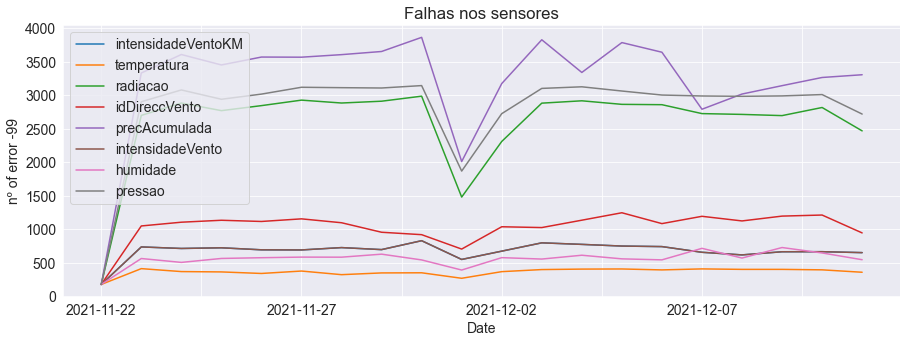

In [33]:
Sum_Error_DF=contagem_erros_sensores(Day_list,feature_list,Data_DF,Stations_ID)

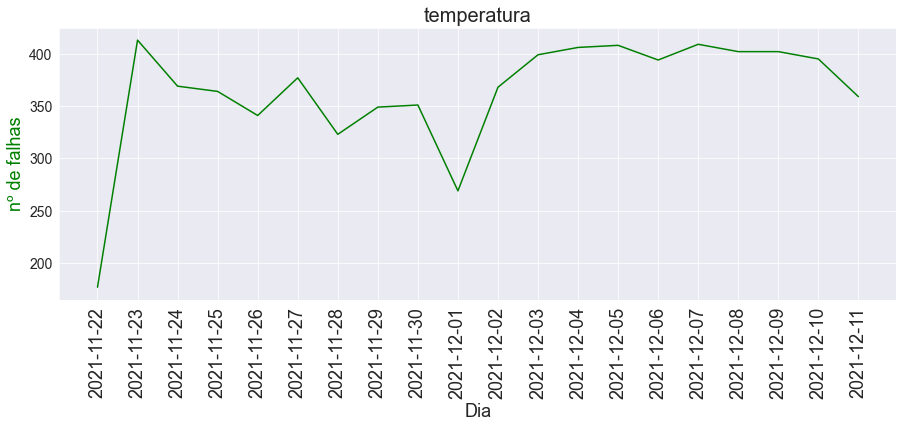

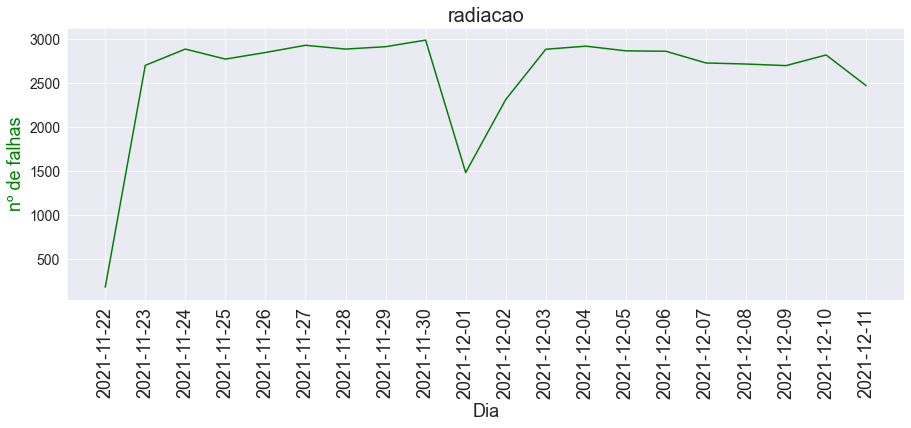

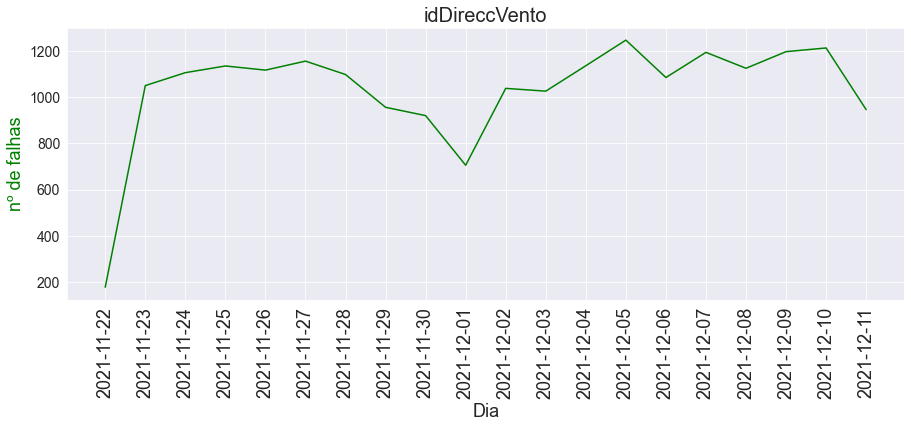

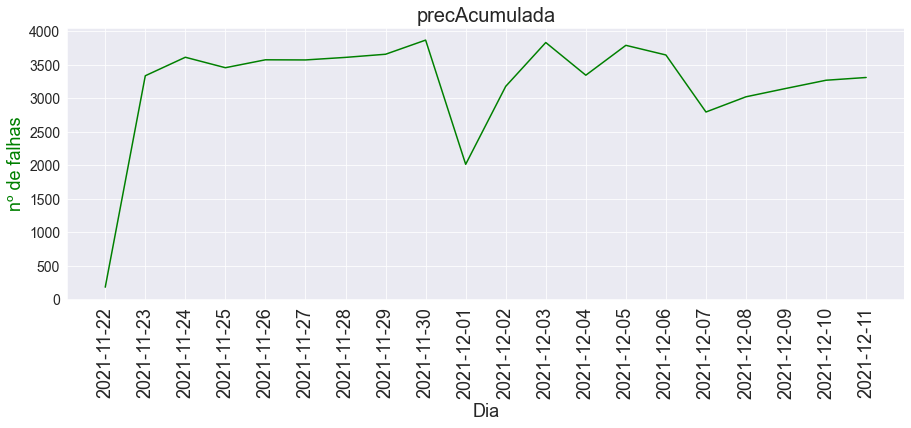

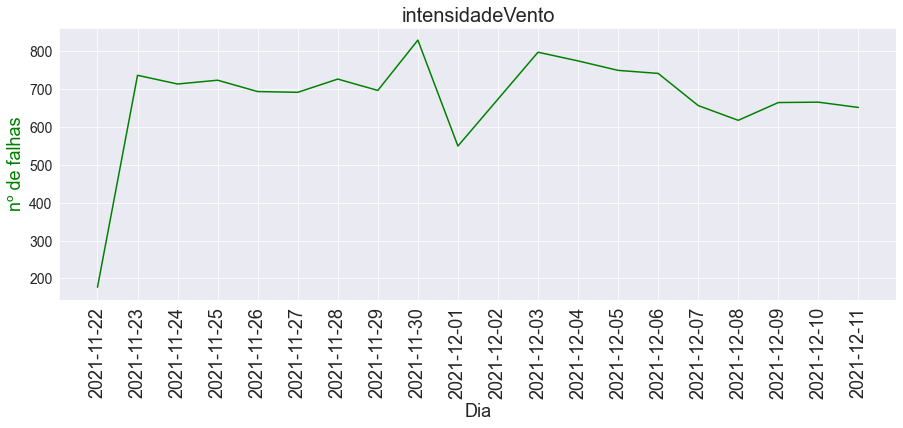

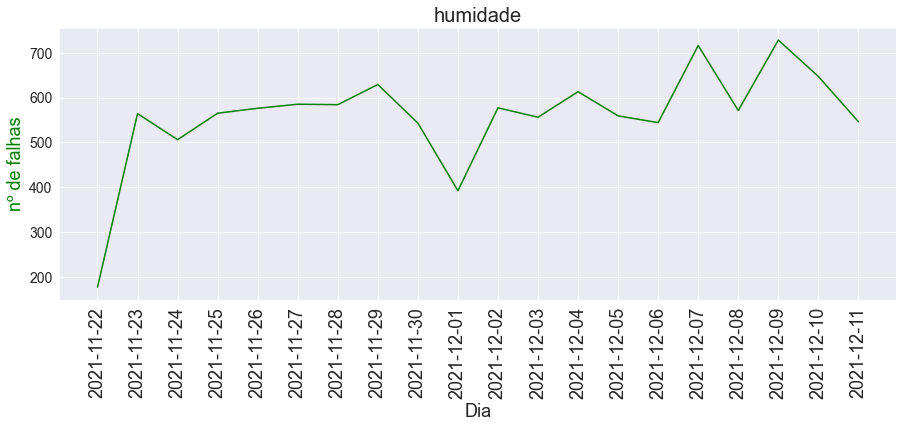

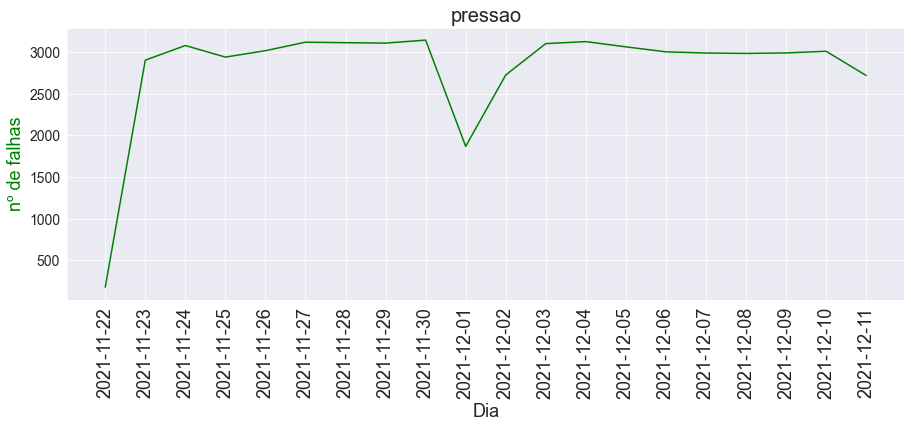

In [37]:
for i,feat in enumerate(feature_list):
    if i>2:
        plt_falhas_sensores(Day_list,feat,Sum_Error_DF)

## 2.2. construir dataset para analise

In [34]:
Stations_ID

array([ 1200501,  1200502,  1200504,  1200506,  1200507,  1200510,
        1200511,  1200512,  1200515,  1200521,  1200522,  1200524,
        1200531,  1200533,  1200535,  1200541,  1200545,  1200548,
        1200551,  1200554,  1200558,  1200559,  1200560,  1200562,
        1200567,  1200568,  1200570,  1200571,  1200575,  1200576,
        1200579,  1210513,  1210577,  1210604,  1210605,  1210606,
        1210611,  1210612,  1210615,  1210616,  1210619,  1210622,
        1210630,  1210632,  1210633,  1210635,  1210637,  1210643,
        1210644,  1210649,  1210654,  1210655,  1210657,  1210663,
        1210666,  1210669,  1210671,  1210683,  1210685,  1210686,
        1210687,  1210690,  1210697,  1210698,  1210702,  1210704,
        1210705,  1210707,  1210713,  1210716,  1210718,  1210721,
        1210724,  1210726,  1210729,  1210734,  1210739,  1210744,
        1210746,  1210747,  1210750,  1210762,  1210765,  1210766,
        1210767,  1210770,  1210773,  1210776,  1210783,  1210

In [13]:
print('Estacoes disponiveis\n',DF_estation[['ID','Local']] )

Estacoes disponiveis
            ID                                 Local
0     1210881                           Olhão, EPPO
1     1210883                                Tavira
2    11217430  Graciosa / Serra das Fontes (DROTRH)
3     6212121          Terras de Bouro/Barral (CIM)
4     6212122                 Amares Caldelas (CIM)
..        ...                                   ...
191   6213620            Oliveira do Hospital (CIM)
192   6213621                           Soure (CIM)
193   1240566                    Vila Real (Cidade)
194   1210874                             Albufeira
195   1210878                  Portimão (Aeródromo)

[196 rows x 2 columns]


In [22]:
estacao=89             #numero da estacao de acordo com a ordenacao em Stations_ID
dia_analise= -1     #dia da lista de dias que se quer analisar 0: 22/11/2021
station_name,feature_list,DF11,days=station_choice(Stations_ID,DF1,feature_list,DF_estation,estacao)
df_analise= DF11.loc[DF11['D/H Sample'].str.contains(Day_list[dia_analise])]
days = df_analise[feature_list[0]].unique()

## plot Settings

In [17]:
sns.set_style ('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(15,5)
matplotlib.rcParams['figure.facecolor']='#00000000'

font_title = {'family': 'serif','color':  'green','weight': 'normal','size': 16}
font_axis = {'family': 'serif','color':  'blue','weight': 'normal','size': 10}

## Plot functions

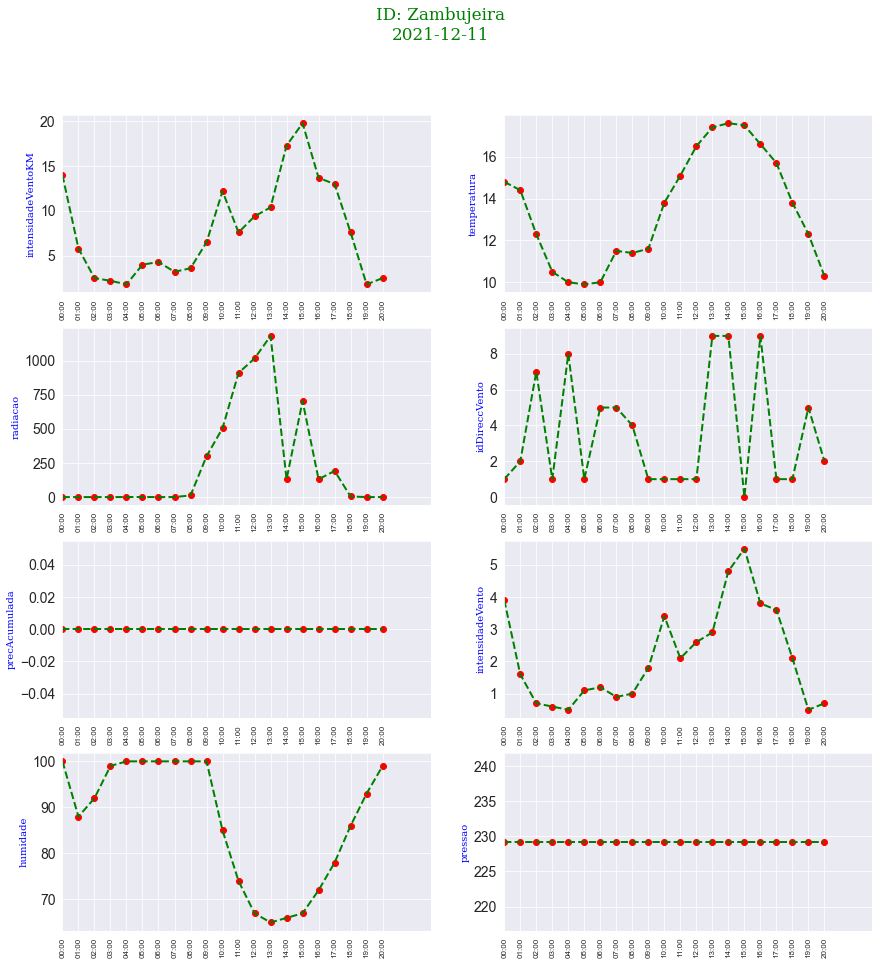

In [26]:
def plot_feat_st(pfs_df,pfs_DF_St,pfs_StName,pfs_day,pfs_Sv=None):
    
    pfs_feat=pfs_df.columns
    days = pfs_df['Hora'].unique()
    feat_len=pfs_feat.shape[0]
    number_plot=feat_len-4
    number_rows=2
    number_lines=int(number_plot/number_rows)
    figura=plt.figure(figsize=(15,15))
    figura.suptitle(f'ID: {pfs_StName}\n{pfs_day}',fontdict=font_title, va='top')
    graph=1
    x=np.linspace(1,pfs_df.shape[0],pfs_df.shape[0])
    for i,feat in enumerate(pfs_feat):
        if i>1 and i<10:
            nb_fig=int('%s%s%s' %(number_lines,number_rows,graph))
            figura.add_subplot(nb_fig)
            plt.ylabel(pfs_feat[i],fontdict=font_axis)
            y=pfs_df[pfs_feat[i]]
            plt.scatter( days,y,alpha=1,color='r')
            plt.plot( days,y,alpha=1,color='g', ls='--', lw='2')
            plt.xticks(days,rotation='vertical', size=8)
            plt.axis(xmin=0,xmax=23)
            plt.subplots_adjust( left= 0.15,bottom=None, right=None, top=None, wspace=None, hspace=None)
            graph=graph+1
    if pfs_Sv=='S':
        plt.savefig('graficos.png')
    plt.show()
            
if estacao==estacao:
    station_name,feature_list,DF11,days=station_choice(Stations_ID,DF1,feature_list,DF_estation,estacao)    
    df_analise= DF11.loc[DF11['D/H Sample'].str.contains(Day_list[dia_analise])]
    df_analise['Data'], df_analise['Hora']=df_analise[feature_list[0]].str.split('T', 1).str
    plot_feat_st(df_analise,DF_estation,station_name,Day_list[dia_analise],'S')


### Todos os dias do dataset para a estacao selecionada

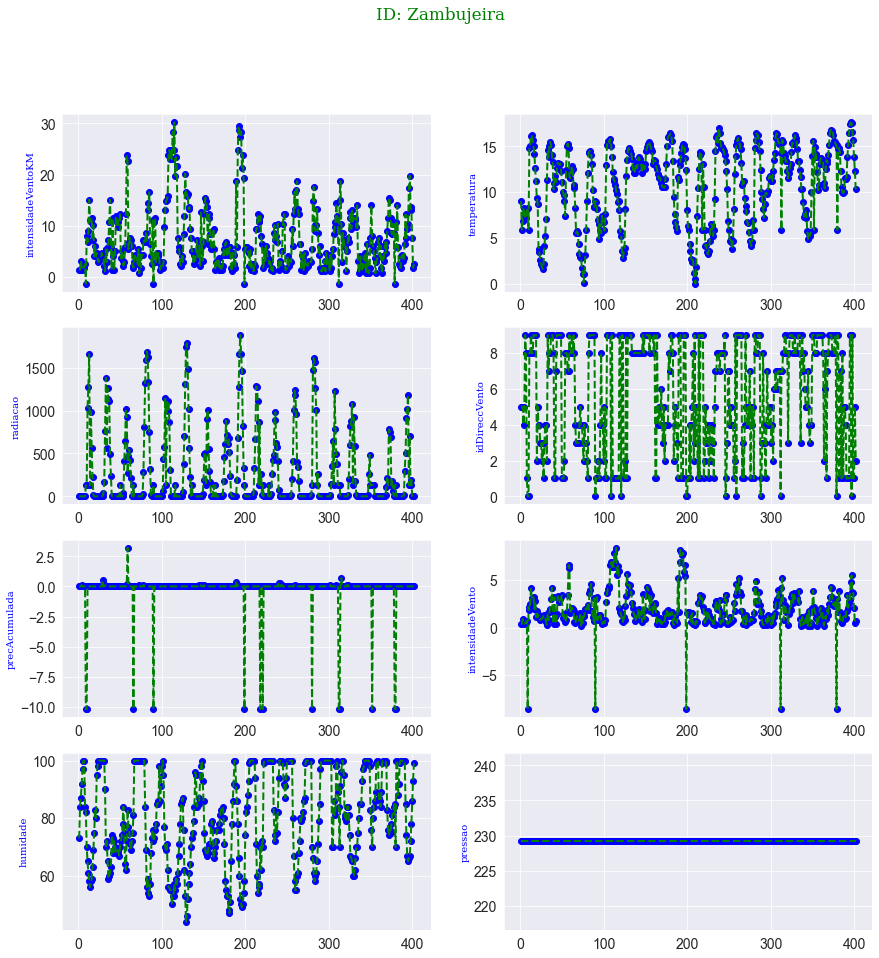

In [38]:
def plot_feat_st(pfs_df,pfs_DF_St,pfs_StName,pfs_Sv=None):
    pfs_feat=pfs_df.columns
    feat_len=pfs_feat.shape[0]
    number_plot=feat_len-2
    number_rows=2
    number_lines=int(number_plot/number_rows)
    figura=plt.figure(figsize=(15,15))
    figura.suptitle(f'ID: {pfs_StName}\n',fontdict=font_title, va='top')
    graph=1
    x=np.linspace(1,pfs_df.shape[0],pfs_df.shape[0])
    for i,feat in enumerate(pfs_feat):
        if i>1:
            nb_fig=int('%s%s%s' %(number_lines,number_rows,graph))
            figura.add_subplot(nb_fig)
            plt.ylabel(pfs_feat[i],fontdict=font_axis)
            y=pfs_df[pfs_feat[i]]
            plt.scatter( x,y,alpha=1,color='b')#,marker='*' ls='--', lw='2')
            plt.plot( x,y,alpha=1,color='g', ls='--', lw='2')
            #plt.xticks(x,rotation='vertical', size=8)
            plt.subplots_adjust( left= 0.15,bottom=None, right=None, top=None, wspace=None, hspace=None)
            graph=graph+1
    if pfs_Sv=='S':
        plt.savefig('graficos.png')
    plt.show()
            
if estacao==estacao:
    station_name,feature_list,DF11,days=station_choice(Stations_ID,DF1,feature_list,DF_estation,estacao)    
    plot_feat_st(DF11,DF_estation,station_name,'S')

### 3 dias

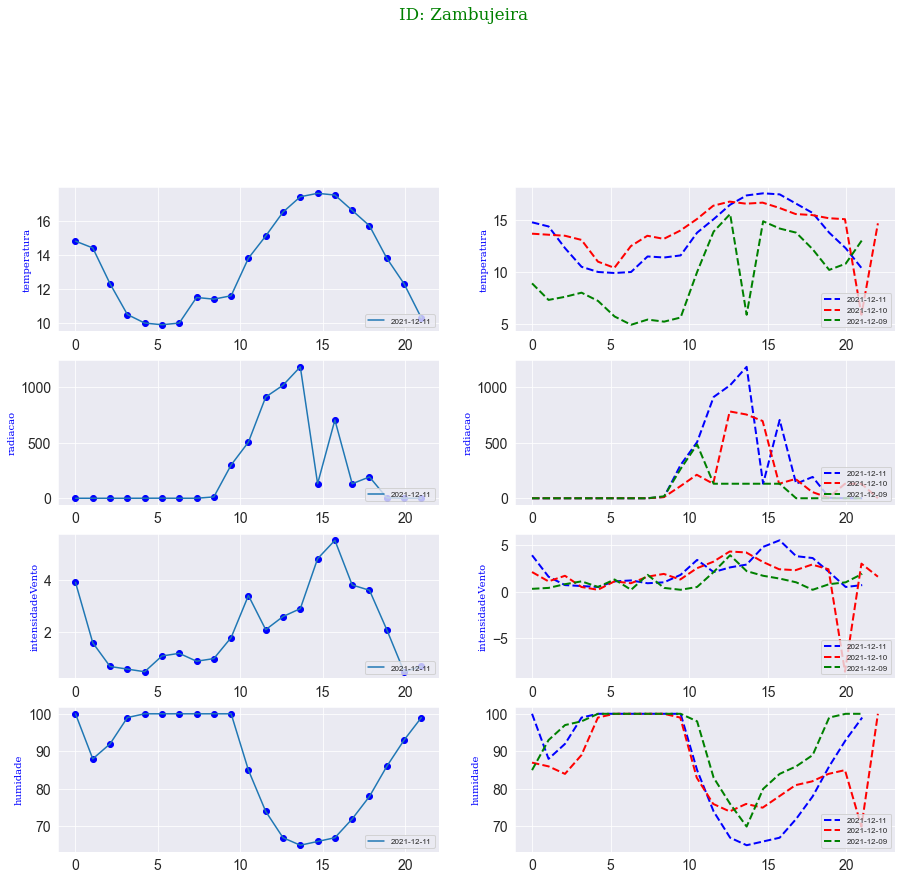

In [39]:
def plt_1_3d(p13_DF,p13_DF_estation,p13_day=None, p13_station=None):
    
    station_name = p13_DF_estation.loc[p13_DF_estation['ID'] == p13_station,'Local'].values[0]
    df=p13_DF.copy()
    lt_feat=[ 'temperatura', 'radiacao', 'intensidadeVento', 'humidade']
    df=df.loc[df['ID']==p13_station]
    lt_days=df['D/H Sample'].str[0:10].unique()
    lt_days.sort()             #dias possiveis de serem exibidos
    feat_len=df.shape[1]
    number_plot=(feat_len-2)*2
    number_rows=2
    number_lines=int(number_plot/number_rows)
    for i, d in enumerate(lt_days):
        if d==p13_day:
            break    
    df_day=df.loc[df['D/H Sample'].str.contains(p13_day)]
    figura=plt.figure(figsize=(15,25))
    figura.suptitle(f'ID: {station_name}\n',fontdict=font_title, va='top')
    graph=1
    for idx, feat in enumerate(lt_feat):
        if idx>=0:
            nb_fig=int('%s%s%s' %(number_lines,number_rows,graph))
            figura.add_subplot(nb_fig)
            plt.ylabel(lt_feat[idx],fontdict=font_axis)
            x_0=np.linspace(0,df_day.shape[0],df_day.shape[0])
            y=df_day[lt_feat[idx]]
            plt.plot(x_0,y,label=lt_days[i])
            plt.scatter( x_0,y,alpha=1,color='b')
            plt.legend(loc=4,fontsize=8)
            graph=1+graph
            nb_fig=int('%s%s%s' %(number_lines,number_rows,graph))
            figura.add_subplot(nb_fig)
            plt.ylabel(lt_feat[idx],fontdict=font_axis)
            plt.plot(x_0,y, label=lt_days[i],color='b', ls='--', lw='2')
            if i>=1:
                df_31day=df.loc[df['D/H Sample'].str.contains(lt_days[i-1])]            
                x_1=np.linspace(0,df_31day.shape[0],df_31day.shape[0])
                plt.plot(x_1,df_31day[lt_feat[idx]], label=lt_days[i-1],color='r', ls='--', lw='2')
            if i>=2:
                df_32day=df.loc[df['D/H Sample'].str.contains(lt_days[i-2])]
                x_2=np.linspace(0,df_32day.shape[0],df_32day.shape[0])
                plt.plot(x_2,df_32day[lt_feat[idx]], label=lt_days[i-2],color='g', ls='--', lw='2')
            plt.legend(loc=4,fontsize=8)
            graph=1+graph
    plt.show()
    
plt_1_3d(DF11,DF_estation,Day_list[dia_analise],Stations_ID[estacao])

## Exibir valores minimos, medios e maximos para todos os dias do dataset e estacao definida


In [40]:
def drdf(index,columns):
    df= pd.DataFrame(index=index, columns=columns)
    df['ID1']=df.index
    return df
    
df_temperaturas_minimas=drdf(Stations_ID,Day_list)
df_radiacao_minimas=drdf(Stations_ID,Day_list)
df_vento_minimas=drdf(Stations_ID,Day_list)
df_precipitacao_minimas=drdf(Stations_ID,Day_list)
df_humidade_minimas=drdf(Stations_ID,Day_list)
df_temperaturas_medias=drdf(Stations_ID,Day_list)
df_radiacao_medias=drdf(Stations_ID,Day_list)
df_vento_medias=drdf(Stations_ID,Day_list)
df_precipitacao_medias=drdf(Stations_ID,Day_list)
df_humidade_medias=drdf(Stations_ID,Day_list)
df_temperaturas_maximas=drdf(Stations_ID,Day_list)
df_radiacao_maximas=drdf(Stations_ID,Day_list)
df_vento_maximas=drdf(Stations_ID,Day_list)
df_precipitacao_maximas=drdf(Stations_ID,Day_list)
df_humidade_maximas=drdf(Stations_ID,Day_list)

In [41]:
#minimas
for idx,day in enumerate(Day_list):
    DfDayStudy=DF1.loc[DF1['D/H Sample'].str.contains(day)]
    Min_Val_St = DfDayStudy.groupby([feature_list[1]]).min()    
    Min_Val_St['ID1']=Min_Val_St.index
    Min_Val_St.sort_values('ID1', ascending=False)
    cols = list(Min_Val_St.columns.values)
    Min_Val_St = Min_Val_St[[cols[-1]] +cols[0:9]]
    Stations_ID=Min_Val_St['ID1'].unique()
    for idxSt,Station in enumerate(Stations_ID):
        a=Min_Val_St.loc[Min_Val_St['ID1']==Station,'temperatura'].values[0]
        df_temperaturas_minimas.loc[(df_temperaturas_minimas['ID1']==Station),day]=a
        b=Min_Val_St.loc[Min_Val_St['ID1']==Station,'radiacao'].values[0]
        df_radiacao_minimas.loc[(df_radiacao_minimas['ID1']==Station),day]=b
        c=Min_Val_St.loc[Min_Val_St['ID1']==Station,'intensidadeVento'].values[0]
        df_vento_minimas.loc[(df_vento_minimas['ID1']==Station),day]=c
        d=Min_Val_St.loc[Min_Val_St['ID1']==Station,'precAcumulada'].values[0]
        df_precipitacao_minimas.loc[(df_precipitacao_minimas['ID1']==Station),day]=d
        e=Min_Val_St.loc[Min_Val_St['ID1']==Station,'humidade'].values[0]
        df_humidade_minimas.loc[(df_humidade_minimas['ID1']==Station),day]=e

In [42]:
#medias
for idx,day in enumerate(Day_list):
    DfDayStudy=DF1.loc[DF1['D/H Sample'].str.contains(day)]
    Mean_Val_St = DfDayStudy.groupby([feature_list[1]]).mean()    
    Mean_Val_St['ID1']=Mean_Val_St.index
    Mean_Val_St.sort_values('ID1', ascending=False)
    cols = list(Mean_Val_St.columns.values)
    #Mean_Val_St = Mean_Val_St[[cols[-1]] +cols[0:9]]
    Stations_ID=Mean_Val_St['ID1'].unique()
    #print( Stations_ID)
    for idxSt,Station in enumerate(Stations_ID):
        a=Mean_Val_St.loc[Mean_Val_St['ID1']==Station,'temperatura'].values[0]
        df_temperaturas_medias.loc[(df_temperaturas_medias['ID1']==Station),day]=a
        b=Mean_Val_St.loc[Mean_Val_St['ID1']==Station,'radiacao'].values[0]
        df_radiacao_medias.loc[(df_radiacao_medias['ID1']==Station),day]=b
        c=Mean_Val_St.loc[Mean_Val_St['ID1']==Station,'intensidadeVento'].values[0]
        df_vento_medias.loc[(df_vento_medias['ID1']==Station),day]=c
        d=Mean_Val_St.loc[Mean_Val_St['ID1']==Station,'precAcumulada'].values[0]
        df_precipitacao_medias.loc[(df_precipitacao_medias['ID1']==Station),day]=d
        e=Mean_Val_St.loc[Mean_Val_St['ID1']==Station,'humidade'].values[0]
        df_humidade_medias.loc[(df_humidade_medias['ID1']==Station),day]=e

In [43]:
#maximas
for idx,day in enumerate(Day_list):
    DfDayStudy=DF1.loc[DF1['D/H Sample'].str.contains(day)]
    Max_Val_St = DfDayStudy.groupby([feature_list[1]]).max()    
    Max_Val_St['ID1']=Max_Val_St.index
    Max_Val_St.sort_values('ID1', ascending=False)
    cols = list(Max_Val_St.columns.values)
    Max_Val_St = Max_Val_St[[cols[-1]] +cols[0:9]]
    Stations_ID=Max_Val_St['ID1'].unique()
    for idxSt,Station in enumerate(Stations_ID):
        a=Max_Val_St.loc[Max_Val_St['ID1']==Station,'temperatura'].values[0]
        df_temperaturas_maximas.loc[(df_temperaturas_maximas['ID1']==Station),day]=a
        b=Max_Val_St.loc[Max_Val_St['ID1']==Station,'radiacao'].values[0]
        df_radiacao_maximas.loc[(df_radiacao_maximas['ID1']==Station),day]=b
        c=Max_Val_St.loc[Max_Val_St['ID1']==Station,'intensidadeVento'].values[0]
        df_vento_maximas.loc[(df_vento_maximas['ID1']==Station),day]=c
        d=Max_Val_St.loc[Max_Val_St['ID1']==Station,'precAcumulada'].values[0]
        df_precipitacao_maximas.loc[(df_precipitacao_maximas['ID1']==Station),day]=d
        e=Max_Val_St.loc[Max_Val_St['ID1']==Station,'humidade'].values[0]
        df_humidade_maximas.loc[(df_humidade_maximas['ID1']==Station),day]=e

In [44]:
df_radiacao_maximas.head()

,2021-11-22,2021-11-23,2021-11-24,2021-11-25,2021-11-26,2021-11-27,2021-11-28,2021-11-29,2021-11-30,2021-12-01,...,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08,2021-12-09,2021-12-10,2021-12-11,ID1
1200501,0.0,686.4,486.6,590.6,508.0,514.5,630.8,648.7,686.2,578.7,...,845.4,444.5,507.3,517.5,656.8,362.7,673.4,614.1,222.8,1200501
1200502,1.2,1916.8,1424.0,492.9,1702.8,1983.7,1862.2,1832.0,774.9,1309.7,...,1782.4,1580.7,1629.0,1305.6,1086.2,509.2,1832.4,1728.6,757.3,1200502
1200504,130.518949,130.518949,130.518949,130.518949,130.518949,130.518949,130.518949,130.518949,130.518949,130.518949,...,130.518949,130.518949,130.518949,130.518949,130.518949,130.518949,130.518949,130.518949,130.518949,1200504
1200506,130.518949,130.518949,130.518949,130.518949,130.518949,130.518949,130.518949,130.518949,130.518949,130.518949,...,130.518949,130.518949,130.518949,130.518949,130.518949,130.518949,130.518949,130.518949,130.518949,1200506
1200507,0.9,1372.1,976.1,1344.8,1613.5,1836.7,1397.5,1689.6,1177.3,1495.8,...,1724.0,1280.3,1509.1,1229.8,1334.9,947.4,734.7,1052.7,1584.6,1200507


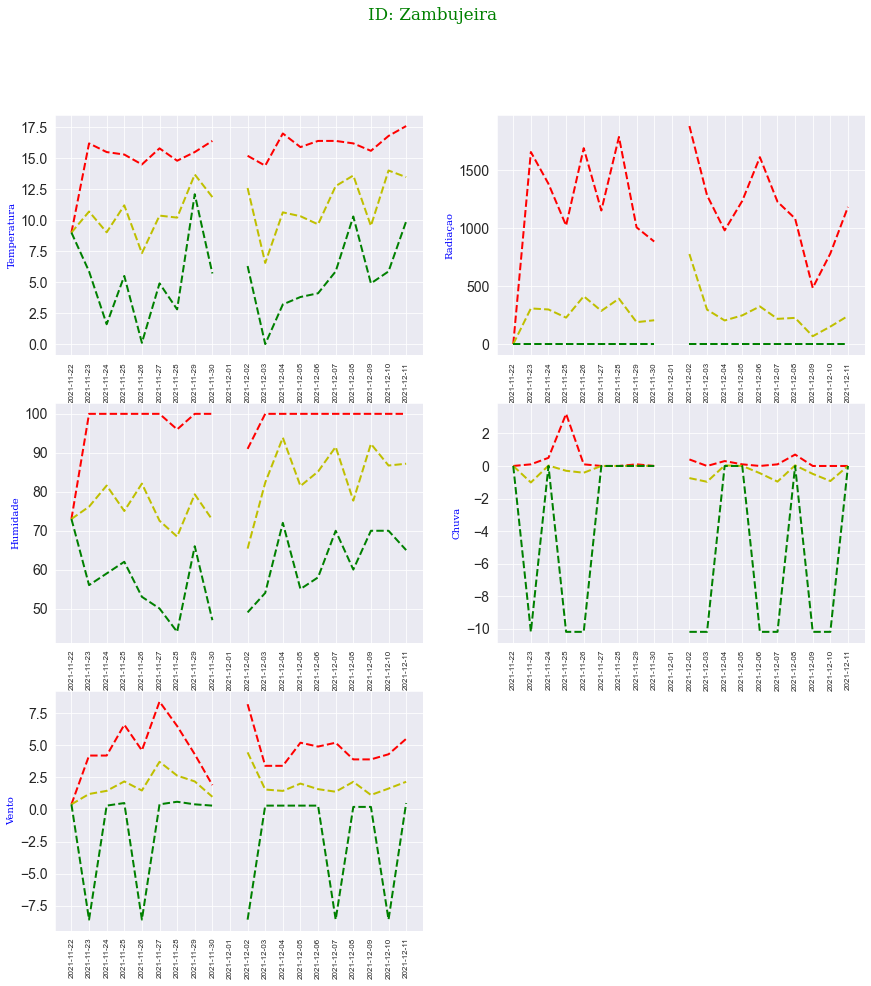

In [45]:
station =Stations_ID[estacao]
x=df_humidade_maximas.columns
x_h=x[:-1]
y_max=df_humidade_maximas.loc[df_humidade_maximas['ID1']==station,:].T
y_max=y_max[:-1]
y_min=df_humidade_minimas.loc[df_humidade_minimas['ID1']==station,:].T
y_min=y_min[:-1]
y_med=df_humidade_medias.loc[df_humidade_medias['ID1']==station,:].T
y_med=y_med[:-1]
h={'x':x_h, 'max':y_max,'med':y_med,'min':y_min}

x=df_temperaturas_maximas.columns
x_t=x[:-1]
y_max=df_temperaturas_maximas.loc[df_temperaturas_maximas['ID1']==station,:].T
y_max=y_max[:-1]
y_min=df_temperaturas_minimas.loc[df_temperaturas_minimas['ID1']==station,:].T
y_min=y_min[:-1]
y_med=df_temperaturas_medias.loc[df_temperaturas_medias['ID1']==station,:].T
y_med=y_med[:-1]
t={'x':x_t, 'max':y_max,'med':y_med,'min':y_min}

x=df_radiacao_maximas.columns
x_r=x[:-1]
y_max=df_radiacao_maximas.loc[df_radiacao_maximas['ID1']==station,:].T
y_max=y_max[:-1]
y_min=df_radiacao_minimas.loc[df_radiacao_minimas['ID1']==station,:].T
y_min=y_min[:-1]
y_med=df_radiacao_medias.loc[df_radiacao_medias['ID1']==station,:].T
y_med=y_med[:-1]
r={'x':x_r, 'max':y_max,'med':y_med,'min':y_min}

x=df_vento_maximas.columns
x_v=x[:-1]
y_max=df_vento_maximas.loc[df_vento_maximas['ID1']==station,:].T
y_max=y_max[:-1]
y_min=df_vento_minimas.loc[df_vento_minimas['ID1']==station,:].T
y_min=y_min[:-1]
y_med=df_vento_medias.loc[df_vento_medias['ID1']==station,:].T
y_med=y_med[:-1]
v={'x':x_v, 'max':y_max,'med':y_med,'min':y_min}

x=df_precipitacao_maximas.columns
x_p=x[:-1]
y_max=df_precipitacao_maximas.loc[df_precipitacao_maximas['ID1']==station,:].T
y_max=y_max[:-1]
y_min=df_precipitacao_minimas.loc[df_precipitacao_minimas['ID1']==station,:].T
y_min=y_min[:-1]
y_med=df_precipitacao_medias.loc[df_precipitacao_medias['ID1']==station,:].T
y_med=y_med[:-1]
p={'x':x_p, 'max':y_max,'med':y_med,'min':y_min}


font_title = {'family': 'serif','color':  'green','weight': 'normal','size': 16}
font_axis = {'family': 'serif','color':  'blue','weight': 'normal','size': 10}
number_lines=3
number_rows=2
pfs_StName = DF_estation.loc[DF_estation['ID'] == station,'Local'].values[0]

figura=plt.figure(figsize=(15,15))
#figura.suptitle(f'ID: {pfs_StName}\n{pfs_day}',fontdict=font_title, va='top')

figura.suptitle(f'ID: {pfs_StName}\n',fontdict=font_title, va='top')
pfs_feat=['Temperatura','Radiaçao','Humidade','Chuva', 'Vento']
graph=1
for i,feat in enumerate(pfs_feat):
    if i==0:
        x=t['x']
        y1=t['max']
        y2=t['med']
        y3=t['min']
    if i==1:
        x=r['x']
        y1=r['max']
        y2=r['med']
        y3=r['min']
    if i==2:
        x=h['x']
        y1=h['max']
        y2=h['med']
        y3=h['min']
    if i==3:
        x=p['x']
        y1=p['max']
        y2=p['med']
        y3=p['min'] 
    if i==4:
        x=v['x']
        y1=v['max']
        y2=v['med']
        y3=v['min'] 
    nb_fig=int('%s%s%s' %(number_lines,number_rows,graph))
    figura.add_subplot(nb_fig)
    plt.ylabel(pfs_feat[i],fontdict=font_axis)
    plt.plot( x,y1,alpha=1,color='r', ls='--', lw='2')
    plt.plot( x,y2,alpha=1,color='y', ls='--', lw='2')
    plt.plot( x,y3,alpha=1,color='g', ls='--', lw='2')
    plt.xticks(x,rotation='vertical', size=8)
    plt.subplots_adjust( left= 0.15,bottom=None, right=None, top=None, wspace=None, hspace=None)
    graph=graph+1